In [1]:
import athena as ath
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
import seaborn as sns
import pickle
from pathlib import Path

In [64]:
root = Path('/Users/art/Library/CloudStorage/Box-Box/AI4SCR_group/Conferences/ISMB-2022/source_images')

In [3]:
so = ath.dataset.imc_sample()
for spl in so.obs.keys():
    so.obs[spl].index = so.obs[spl].index.astype(int)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
# define default colormap
so.uns['cmaps'].update({'default': cm.plasma})

# set up colormaps for meta_id
cmap_paper = np.array([[255, 255, 255], [10, 141, 66], [62, 181, 86], [203, 224, 87],  # 0 1 2 3
                       [84, 108, 47], [180, 212, 50], [23, 101, 54],  # 4 5 6
                       [248, 232, 13], [1, 247, 252], [190, 252, 252],  # 7 8 9
                       [150, 210, 225], [151, 254, 255], [0, 255, 250],  # 10 11 12
                       [154, 244, 253], [19, 76, 144], [0, 2, 251],  # 13 14 15
                       [147, 213, 198], [67, 140, 114], [238, 70, 71],  # 16 17 18
                       [80, 45, 143], [135, 76, 158], [250, 179, 195],  # 19 20 21
                       [246, 108, 179], [207, 103, 43], [224, 162, 2],  # 22 23 24
                       [246, 131, 110], [135, 92, 43], [178, 33, 28]])


# define labels for meta_id
cmap_labels = {0: 'Background',
               1: 'B cells',
               2: 'B and T cells',
               3: 'T cell',
               4: 'Macrophages',
               5: 'T cell',
               6: 'Macrophages',
               7: 'Endothelial',
               8: 'Vimentin Hi',
               9: 'Small circular',
               10: 'Small elongated',
               11: 'Fibronectin Hi',
               12: 'Larger elongated',
               13: 'SMA Hi Vimentin',
               14: 'Hypoxic',
               15: 'Apopotic',
               16: 'Proliferative',
               17: 'p53 EGFR', 
               18: 'Basal CK',
               19: 'CK7 CK hi Cadherin',
               20: 'CK7 CK',
               21: 'Epithelial low',
               22: 'CK low HR low',                            
               23: 'HR hi CK',               
               24: 'CK HR', 
               25: 'HR low CK',                             
               27: 'Myoepithalial',
               26: 'CK low HR hi p53'}

so.uns['cmaps'].update({'meta_id': ListedColormap(cmap_paper / 255)})
so.uns['cmap_labels'].update({'meta_id': cmap_labels})

# cell_type_id colormap
cmap = ['white', 'darkgreen', 'gold', 'steelblue', 'darkred', 'coral']
cmap_labels = {0: 'background', 1: 'immune',  2: 'endothelial', 3: 'stromal', 4: 'tumor', 5: 'myoepithelial'}
cmap = ListedColormap(cmap)

so.uns['cmaps'].update({'cell_type_id': cmap})
so.uns['cmap_labels'].update({'cell_type_id': cmap_labels})

In [5]:
# cell_type_id
cmap = ['white', 'darkgreen', 'gold', 'steelblue', 'darkred', 'coral']
cmap_labels = {0: 'background', 1: 'immune',  2: 'endothelial', 3: 'stromal', 4: 'tumor', 5: 'myoepithelial'}
cmap = ListedColormap(cmap)

so.uns['cmaps'].update({'cell_type_id': cmap})
so.uns['cmap_labels'].update({'cell_type_id': cmap_labels})

In [6]:
# tumor_immune_id
cmap = ['black', 'darkorange', 'darkslateblue', 'grey']
cmap_labels = {0: 'background', 1: 'immune',  2: 'tumor', 3: 'other'}
cmap = ListedColormap(cmap)
so.uns['cmaps'].update({'tumor_immune_id': cmap})
so.uns['cmap_labels'].update({'tumor_immune_id': cmap_labels})

# Graph Construction

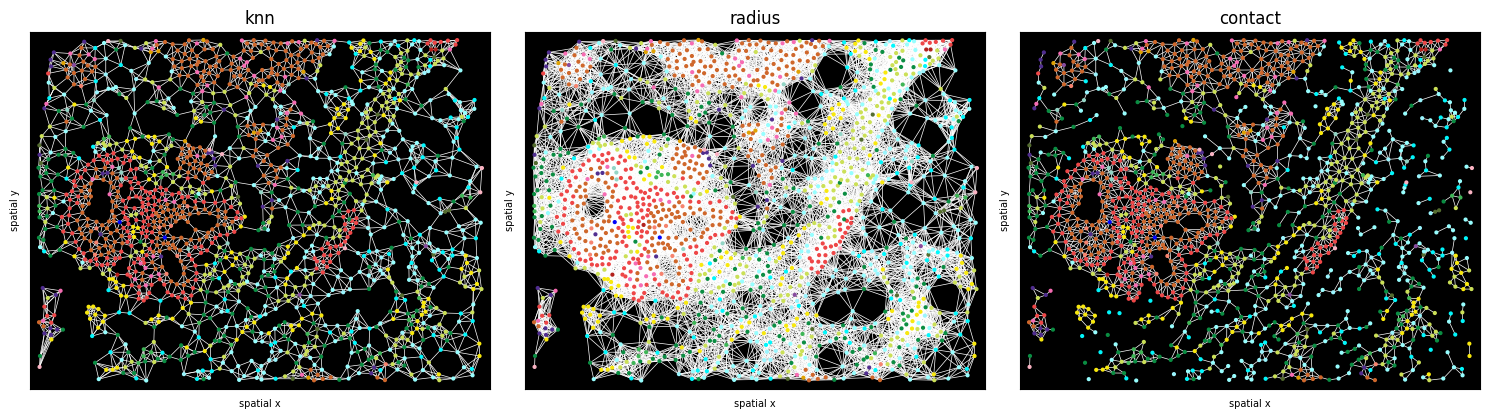

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), dpi=100)
cedge, bg = 'white', 'black'
spl = 'slide_49_By2x5'
ath.pl.spatial(so, spl, 'meta_id', edges=True, graph_key='knn', ax=axs.flat[0], cbar=False, edge_color=cedge, background_color=bg)
ath.pl.spatial(so, spl, 'meta_id', edges=True, graph_key='radius', ax=axs.flat[1], cbar=False, edge_color=cedge, background_color=bg)
ath.pl.spatial(so, spl, 'meta_id', edges=True, graph_key='contact', ax=axs.flat[2], cbar=False, edge_color=cedge, background_color=bg)

for ax, title in zip(axs, ['knn', 'radius', 'contact']):
    ax.set_title(title)

fig.savefig(root / 'graph_representation.pdf', transparent=True)

# Workflow Cellmasks

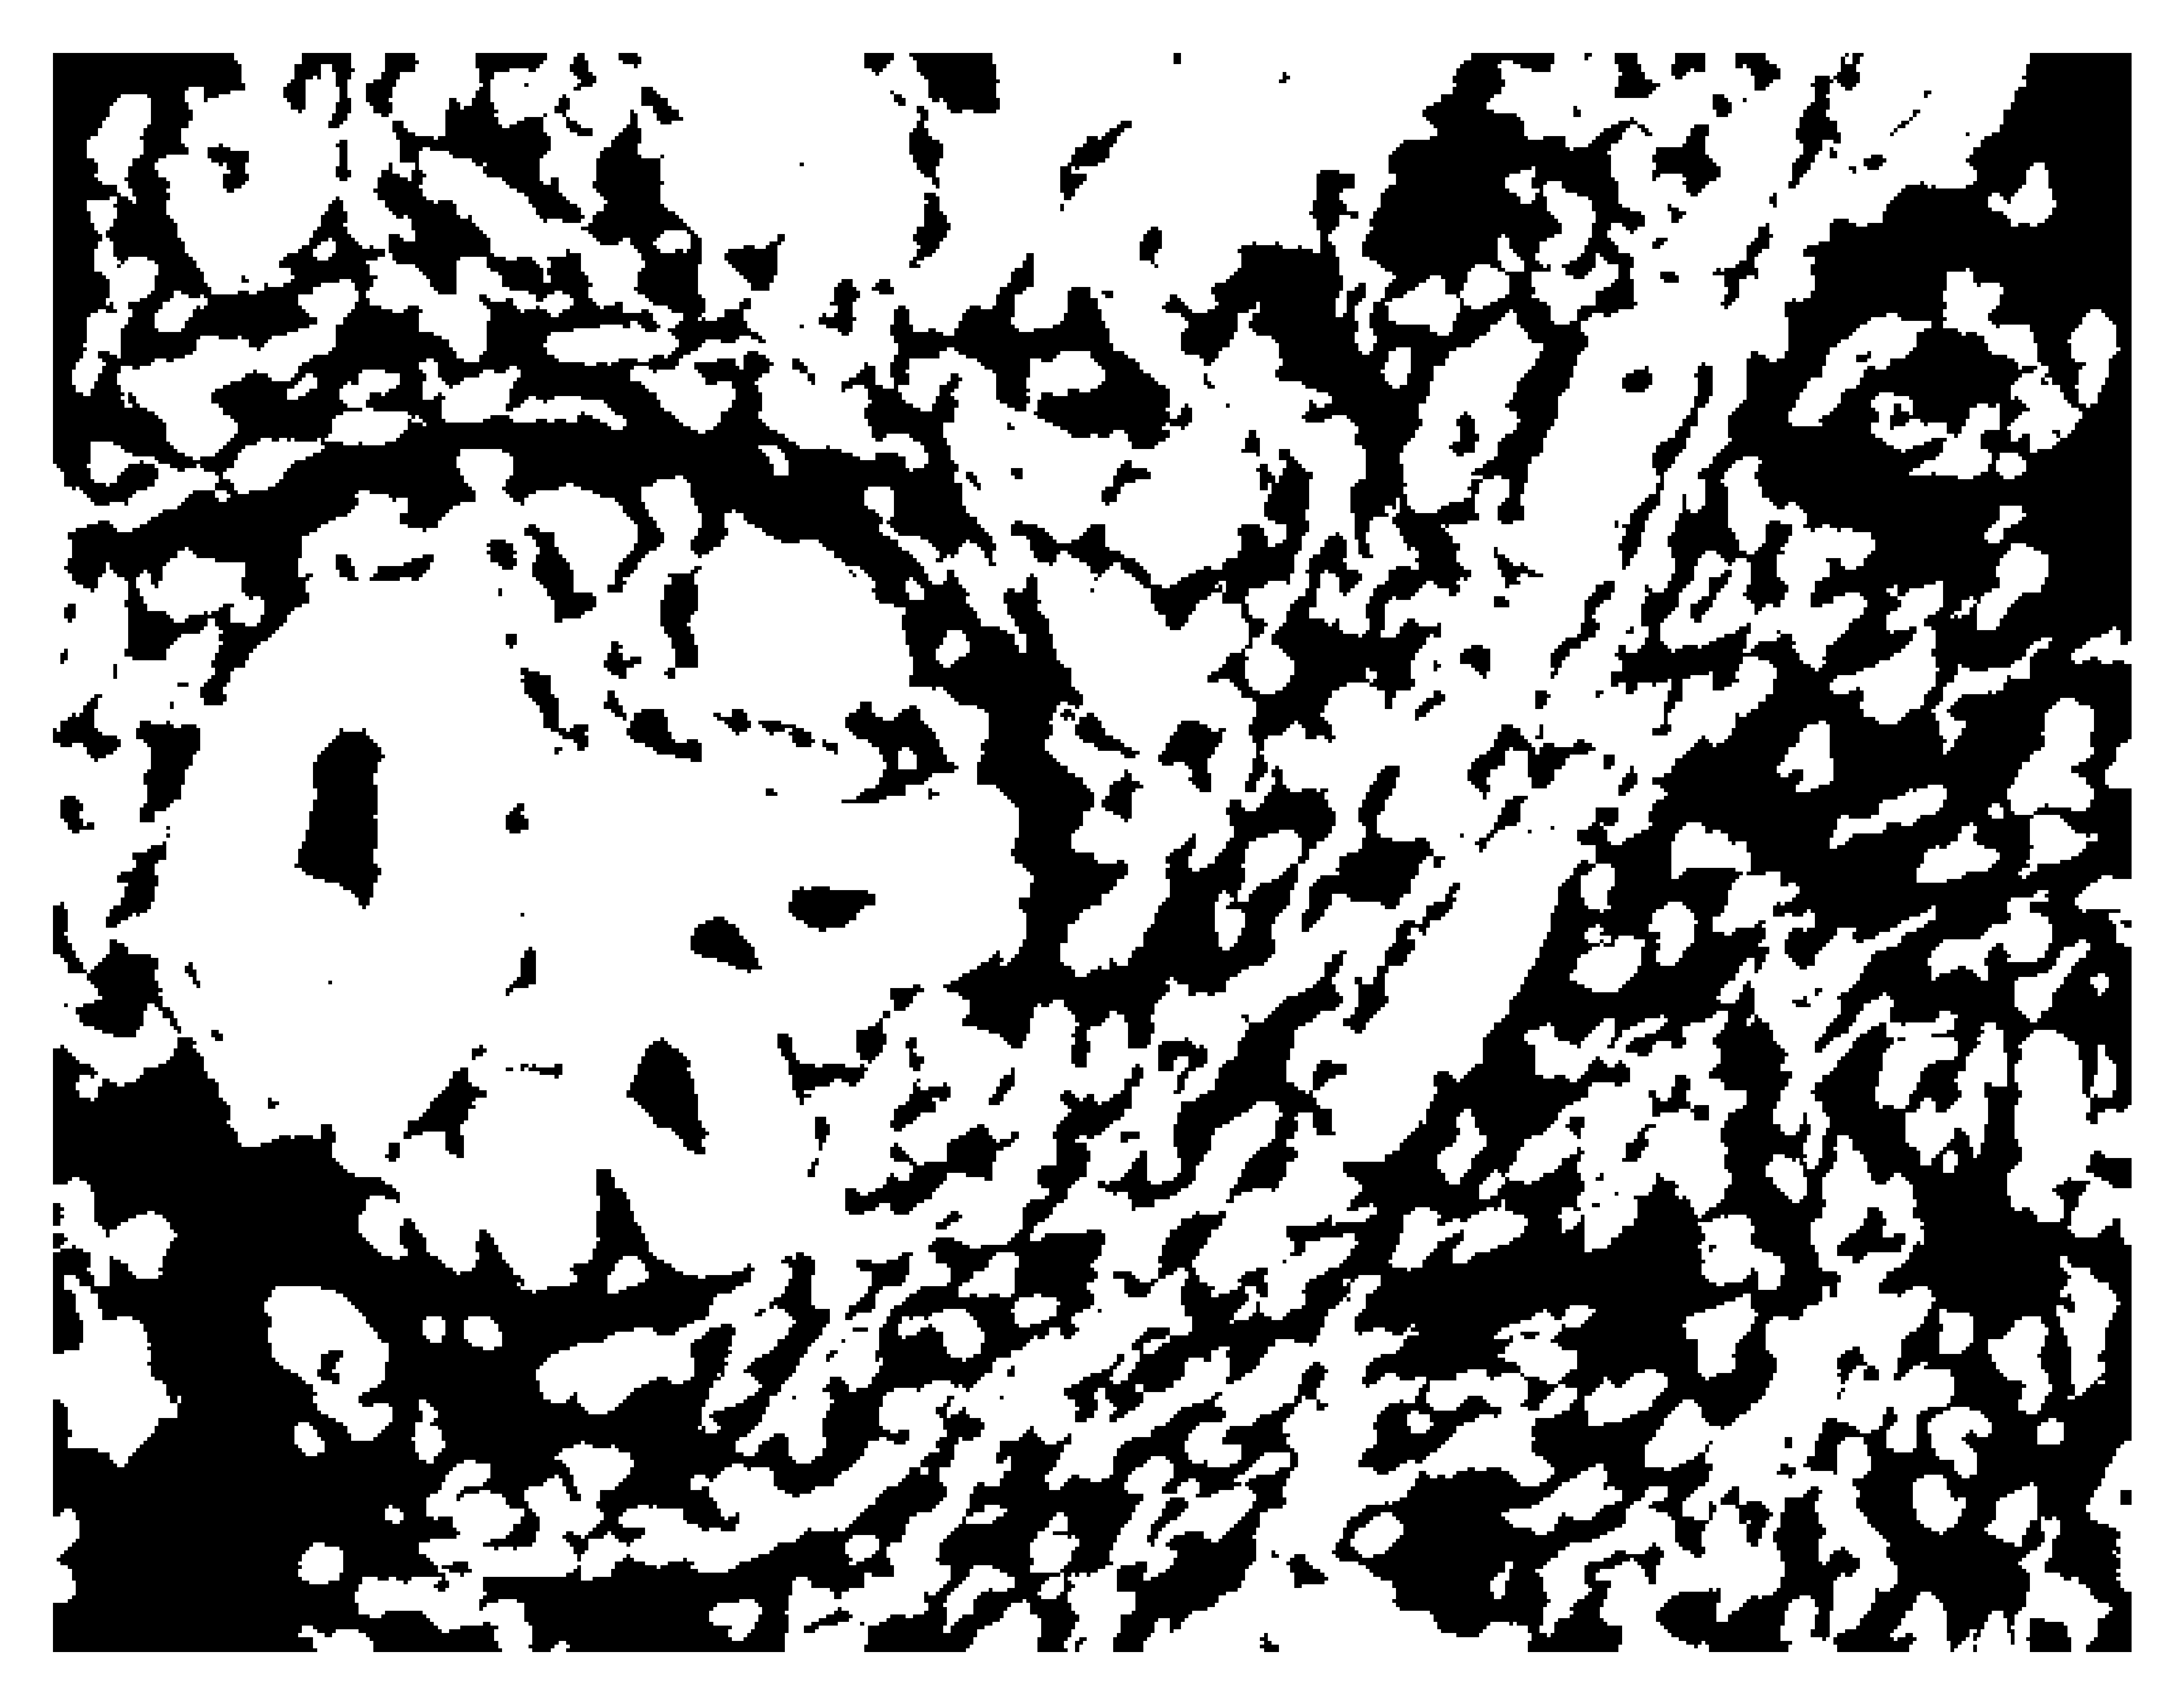

In [25]:
spl = 'slide_49_By2x5'
fig, ax = plt.subplots(dpi=1000)
mask = so.masks[spl]['cellmasks']
ax.imshow(mask > 0, cmap='gray')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_axis_off()
fig.savefig(root / 'workflow-cellmasks.pdf')

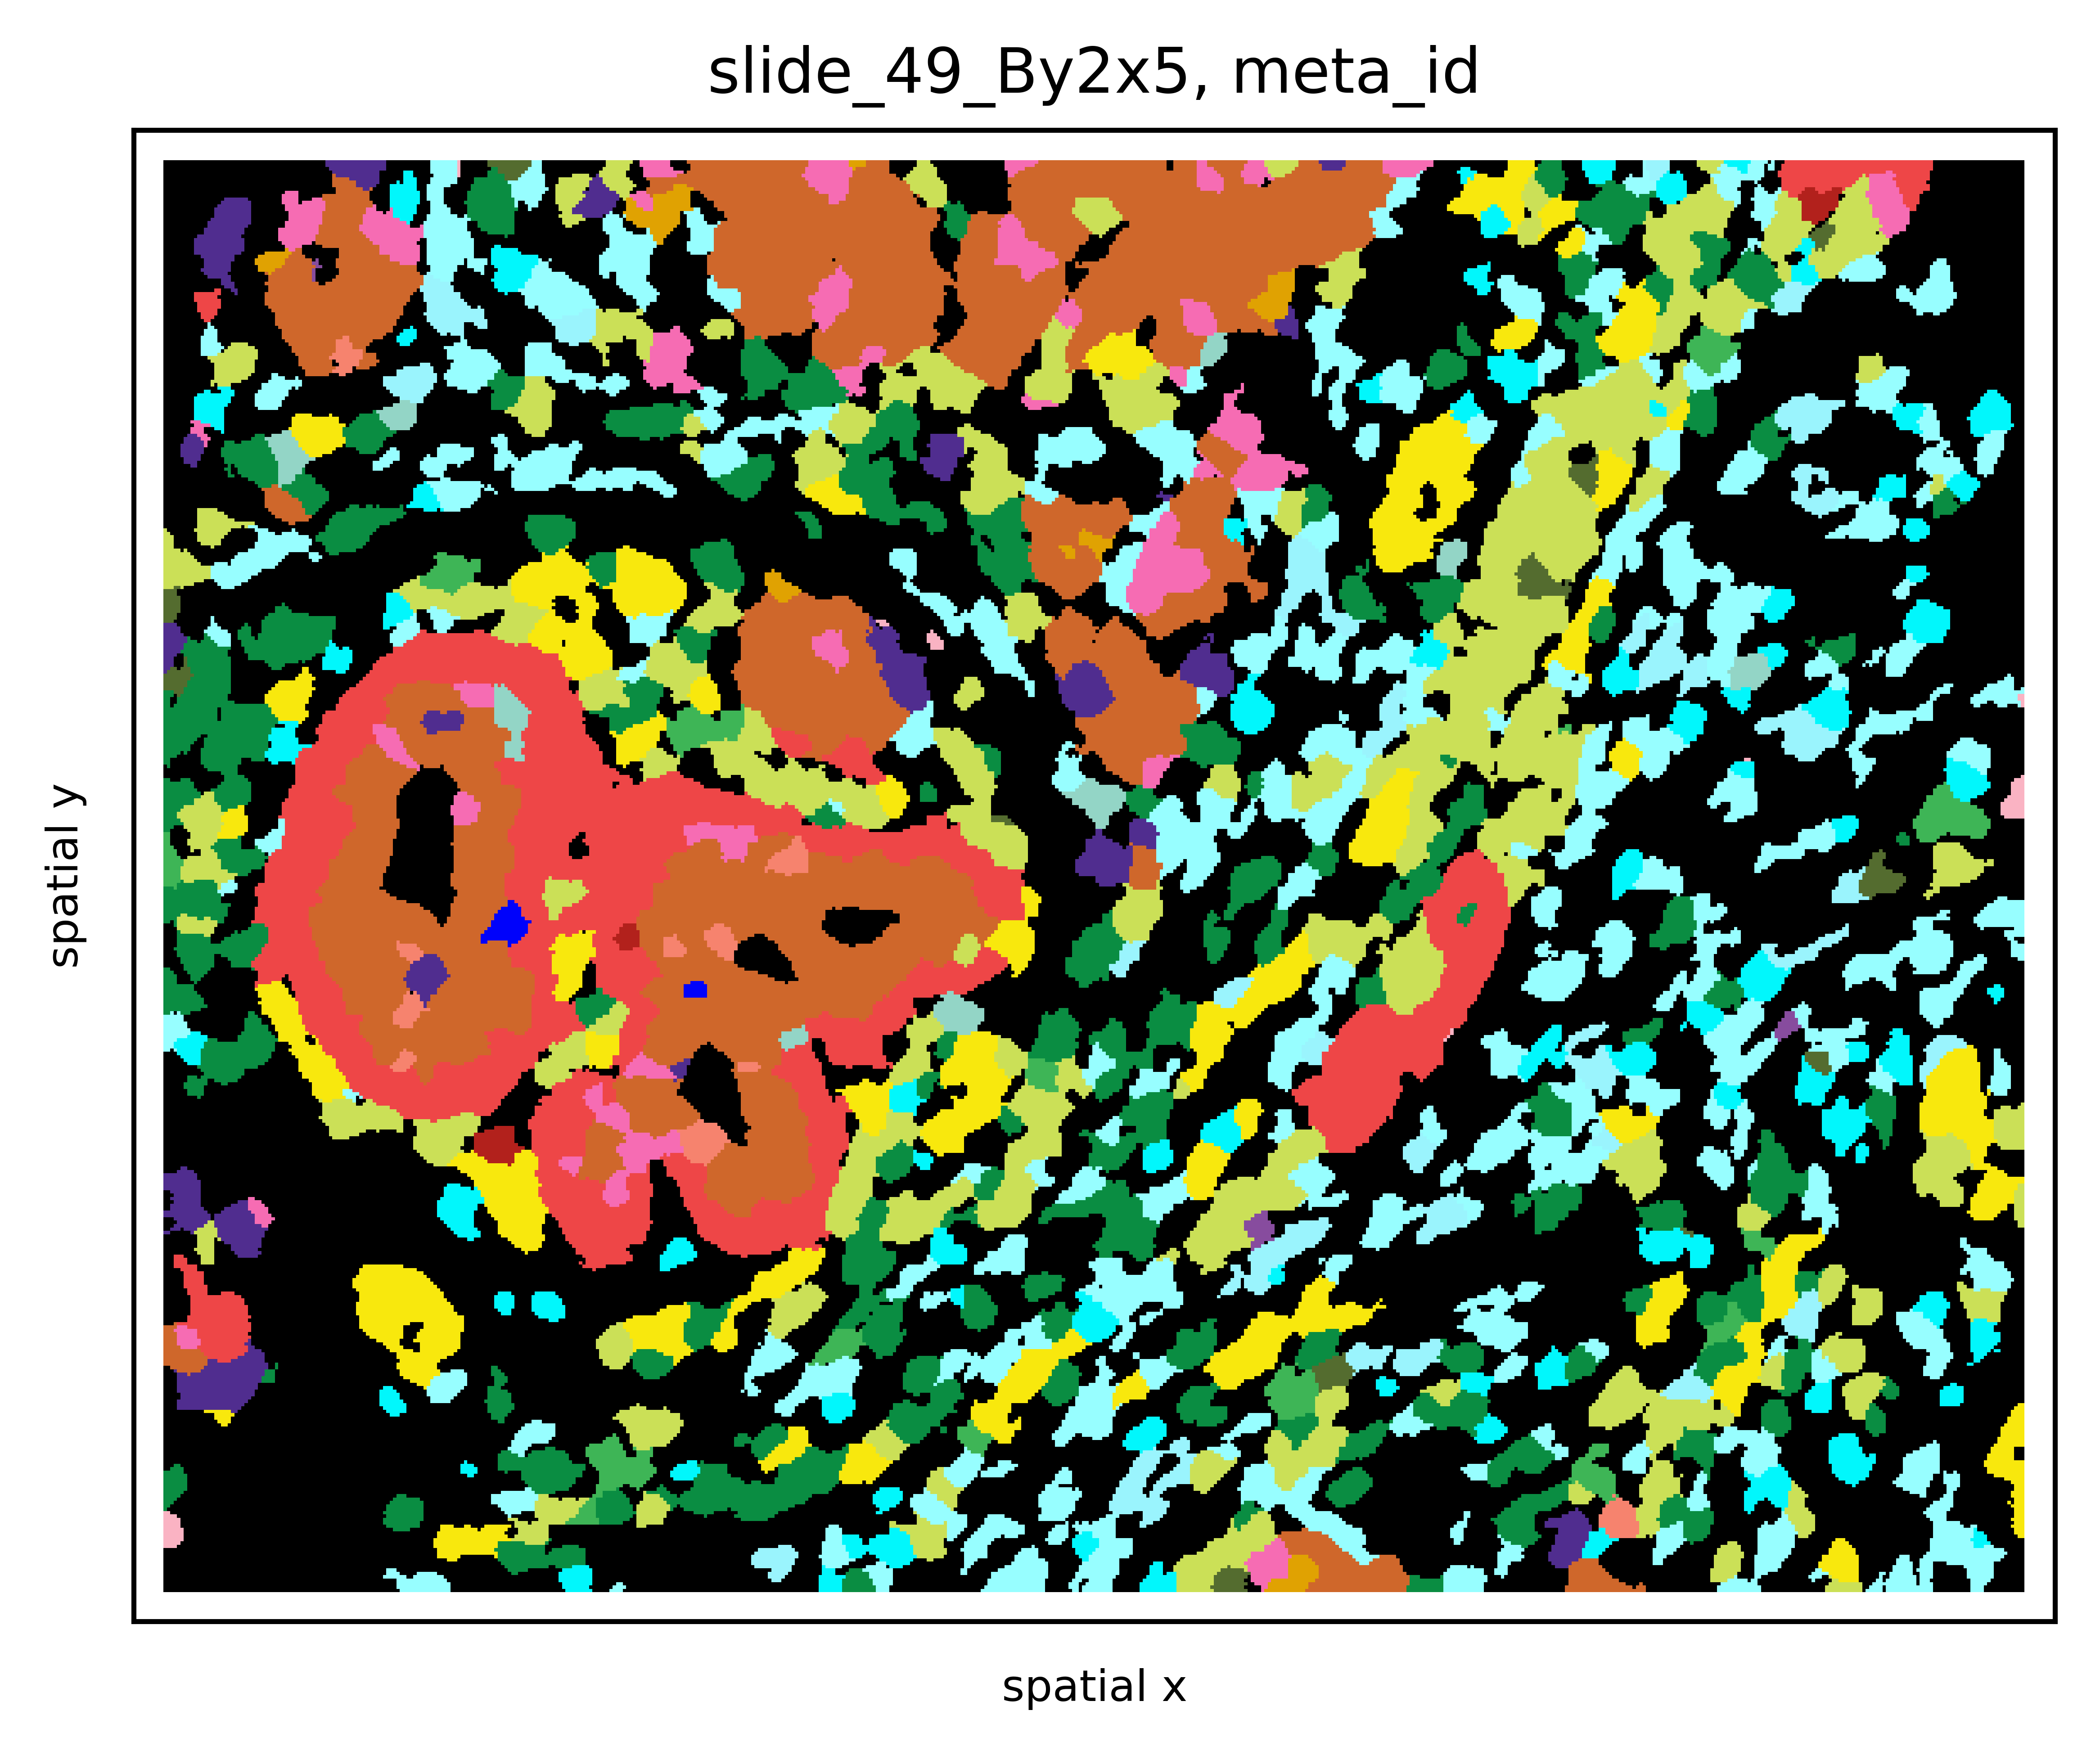

In [24]:
fig, ax = plt.subplots(dpi=1000)
ath.pl.spatial(so, spl, 'meta_id', mode='mask', ax=ax, background_color='black', cbar=False)
fig.savefig(root / 'workflow-meta_ids.pdf')

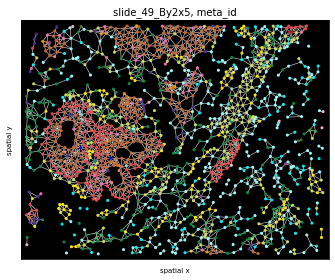

In [23]:
fig, ax = plt.subplots()
ath.pl.spatial(so, spl, 'meta_id', edges=True, graph_key='contact', ax=ax, cbar=False, edge_color=cedge, background_color=bg)
fig.savefig(root / 'workflow-graph.pdf')

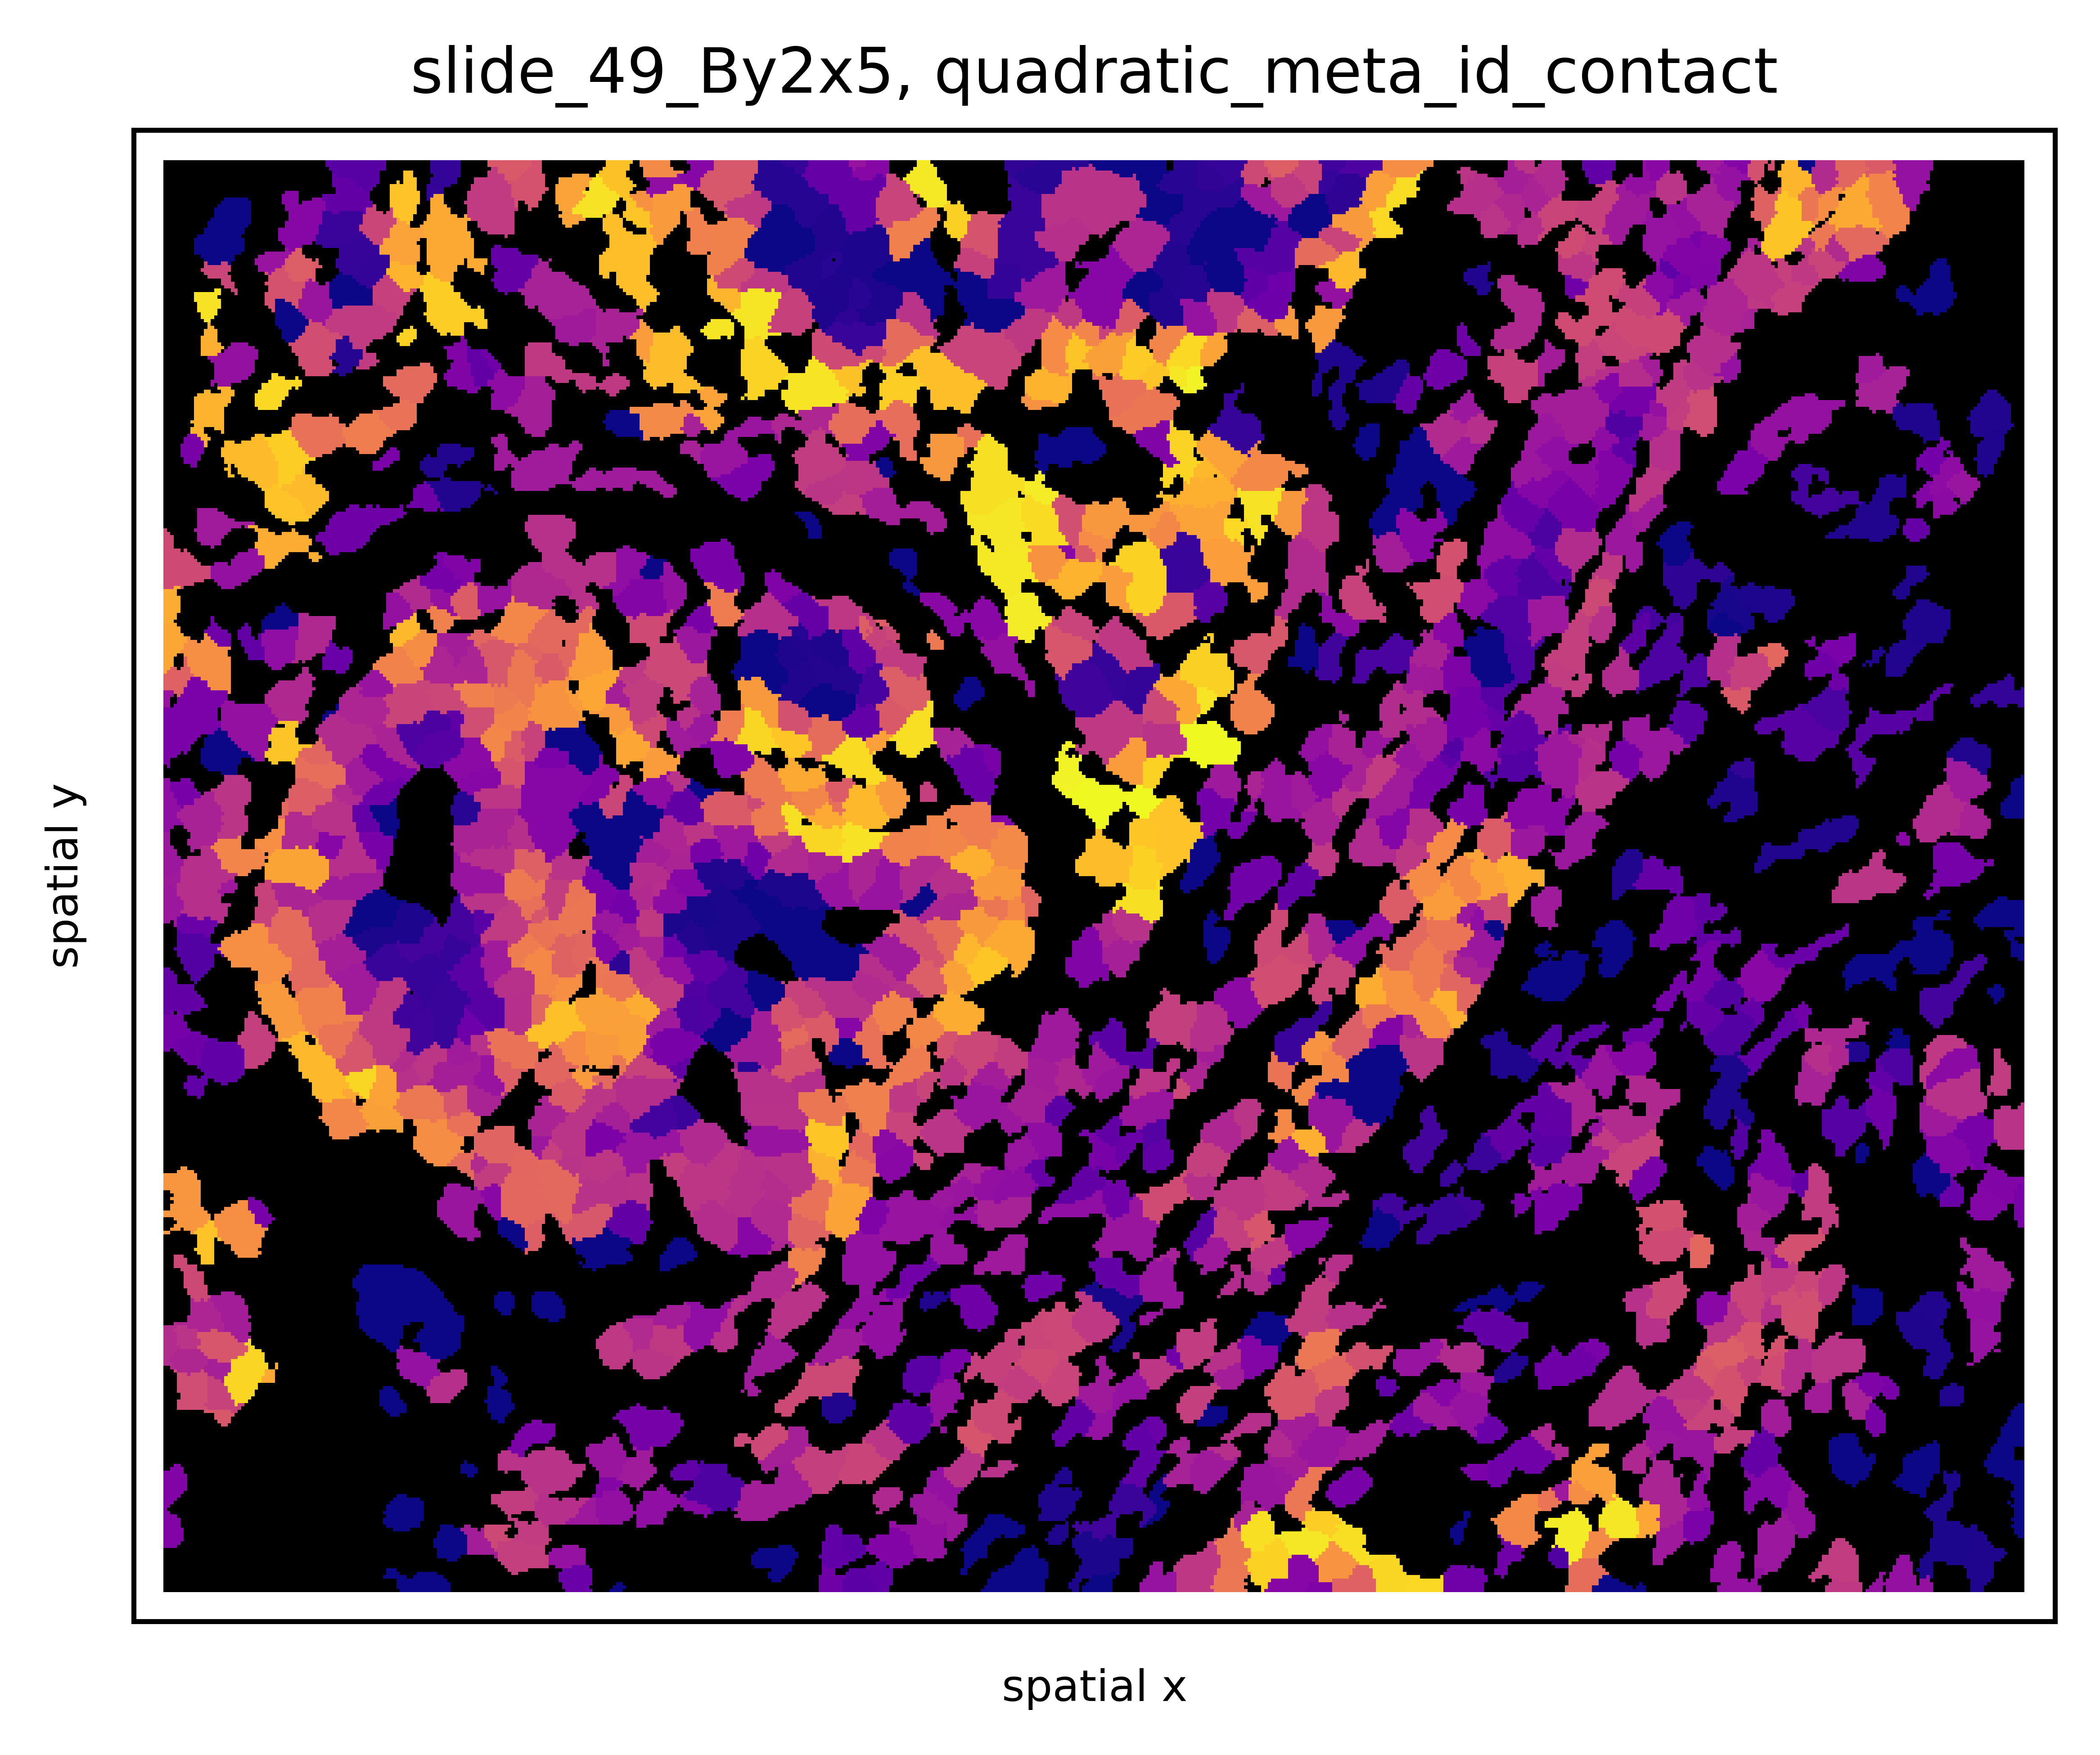

In [30]:
fig, ax = plt.subplots(dpi=1000)
ath.pl.spatial(so, spl, 'quadratic_meta_id_contact', mode='mask', graph_key='contact', ax=ax, cbar=False, edge_color=cedge, background_color=bg)
fig.savefig(root / 'workflow-entropy.pdf')

# Results

In [35]:
cores_entropy = ['SP43_75_X2Y5', 'slide_49_By2x5', 'SP41_239_X11Y3_165']
for s in cores_entropy:
    ath.metrics.quadratic_entropy(so, spl, 'meta_id', local=False, graph_key='contact', metric='cosine')

In [37]:
so.obs[spl].columns

Index(['core', 'meta_id', 'meta_label', 'phenograph_cluster', 'CellId', 'id',
       'cell_type', 'cell_type_id', 'tumor_immune_id', 'tumor_immune', 'y',
       'x', 'infiltration_radius', 'richness_meta_id_contact',
       'shannon_meta_id_contact', 'quadratic_meta_id_contact'],
      dtype='object')

In [65]:
from scipy.stats import skew

# gattr = 'quadratic_meta_id'
gattr = 'shannon_meta_id'
# sattr = 'quadratic_meta_id_contact'
sattr = 'shannon_meta_id_contact'


fig, axs = plt.subplots(4, 3, figsize=(12, 12), dpi=1000, gridspec_kw={'height_ratios': [3,1,3,1]})
for axv, spl in zip(axs.T, cores_entropy):
    ath.pl.spatial(so, spl, 'meta_id', mode='mask', ax=axv[0], cbar=False, background_color='black')
    axv[0].set_title('')
    
    sns.histplot(so.obs[spl]['meta_label'], ax=axv[1], stat='percent')
    axv[1].set_title(f'shannon entropy: {so.spl.loc[spl][gattr]:.2f}')
    axv[1].set_xticklabels([])
    axv[1].set_xticks([])
    axv[1].set_xlabel('cell types')
    
    ath.pl.spatial(so, spl, sattr, mode='mask', ax=axv[2], cbar=False, background_color='black')
    axv[2].set_title('')
    
    data = so.obs[spl][sattr]
    skew_score = skew(data)
    sns.histplot(data, ax=axv[3], stat='percent', bins=30)
    ax: plt.Axes = axv[3]
    # ax.text(ax.get_xlim()[1], ax.get_ylim()[1], f'Skewness: {skew_score:.2f}', horizontalalignment='right', verticalalignment='top')
    left = ax.get_xlim()[1]
    ax.text(left-left*.05, 30, f'Skewness: {skew_score:.2f}', horizontalalignment='right', verticalalignment='top')
    ax.set_ylim([0,35])
    ax.set_xlabel('shannon entropy')
fig.savefig(root / 'results.pdf')